<a href="https://colab.research.google.com/github/ihabiba/DataMining-OnlineLearning/blob/main/Recommender_syatem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity



df = pd.read_csv("personalized_learning_dataset.csv")


print(df.head())     #


  Student_ID  Age  Gender Education_Level       Course_Name  \
0     S00001   15  Female     High School  Machine Learning   
1     S00002   49    Male   Undergraduate     Python Basics   
2     S00003   20  Female   Undergraduate     Python Basics   
3     S00004   37  Female   Undergraduate      Data Science   
4     S00005   34  Female    Postgraduate     Python Basics   

   Time_Spent_on_Videos  Quiz_Attempts  Quiz_Scores  Forum_Participation  \
0                   171              4           67                    2   
1                   156              4           64                    0   
2                   217              2           55                    2   
3                   489              1           65                   43   
4                   496              3           59                   34   

   Assignment_Completion_Rate Engagement_Level  Final_Exam_Score  \
0                          89           Medium                51   
1                          9

In [2]:
print(df.shape)
print(df.columns)

(10000, 15)
Index(['Student_ID', 'Age', 'Gender', 'Education_Level', 'Course_Name',
       'Time_Spent_on_Videos', 'Quiz_Attempts', 'Quiz_Scores',
       'Forum_Participation', 'Assignment_Completion_Rate', 'Engagement_Level',
       'Final_Exam_Score', 'Learning_Style', 'Feedback_Score',
       'Dropout_Likelihood'],
      dtype='object')


In [3]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())


Missing values per column:
Student_ID                    0
Age                           0
Gender                        0
Education_Level               0
Course_Name                   0
Time_Spent_on_Videos          0
Quiz_Attempts                 0
Quiz_Scores                   0
Forum_Participation           0
Assignment_Completion_Rate    0
Engagement_Level              0
Final_Exam_Score              0
Learning_Style                0
Feedback_Score                0
Dropout_Likelihood            0
dtype: int64

Number of duplicate rows: 0


In [4]:
#Basic dataset overview
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)

# Summary statistics for numeric columns
print("\nSummary statistics (numeric):\n", df.describe())

# Summary statistics for categorical columns
print("\nSummary statistics (categorical):\n", df.describe(include=['object']))




Shape of dataset: (10000, 15)

Data types:
 Student_ID                    object
Age                            int64
Gender                        object
Education_Level               object
Course_Name                   object
Time_Spent_on_Videos           int64
Quiz_Attempts                  int64
Quiz_Scores                    int64
Forum_Participation            int64
Assignment_Completion_Rate     int64
Engagement_Level              object
Final_Exam_Score               int64
Learning_Style                object
Feedback_Score                 int64
Dropout_Likelihood            object
dtype: object

Summary statistics (numeric):
                 Age  Time_Spent_on_Videos  Quiz_Attempts   Quiz_Scores  \
count  10000.000000          10000.000000   10000.000000  10000.000000   
mean      32.137700            255.375400       2.500500     64.578600   
std       10.062647            141.656392       1.122642     20.289125   
min       15.000000             10.000000       1.000000   

In [5]:
# Check unique values in each column
print("\nUnique values per column:\n", df.nunique())

print("\nDropout Likelihood distribution:\n", df['Dropout_Likelihood'].value_counts())

# Distribution of Engagement Level
print("\nEngagement Level distribution:\n", df['Engagement_Level'].value_counts())


Unique values per column:
 Student_ID                    10000
Age                              35
Gender                            3
Education_Level                   3
Course_Name                       5
Time_Spent_on_Videos            490
Quiz_Attempts                     4
Quiz_Scores                      70
Forum_Participation              50
Assignment_Completion_Rate       60
Engagement_Level                  3
Final_Exam_Score                 70
Learning_Style                    4
Feedback_Score                    5
Dropout_Likelihood                2
dtype: int64

Dropout Likelihood distribution:
 Dropout_Likelihood
No     8043
Yes    1957
Name: count, dtype: int64

Engagement Level distribution:
 Engagement_Level
Medium    4927
High      2980
Low       2093
Name: count, dtype: int64


### Correlation Heatmap (Numeric Features)


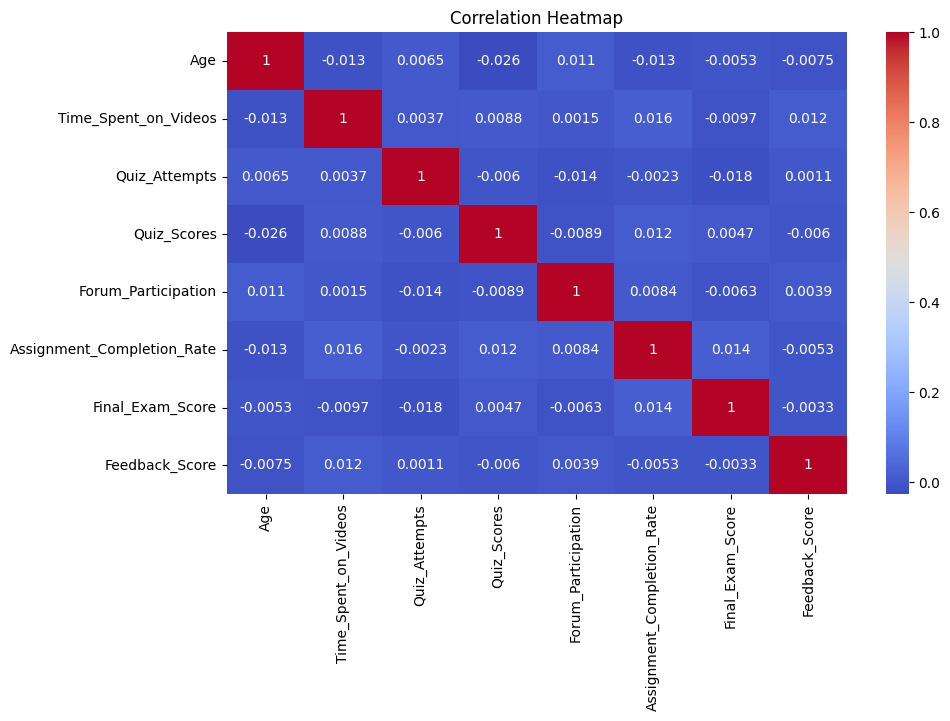

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig(os.path.join(assets_dir, 'correlation_heatmap.png'))
plt.show()

### Age distribution

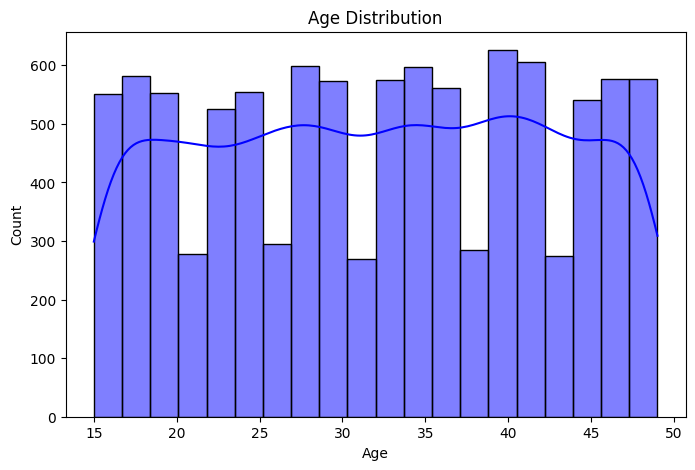

In [22]:

# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color="blue")
plt.title("Age Distribution")
plt.savefig(os.path.join(assets_dir, 'age_distribution.png'))
plt.show()


###  Gender distribution

/tmp/ipython-input-98982468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette="pastel")


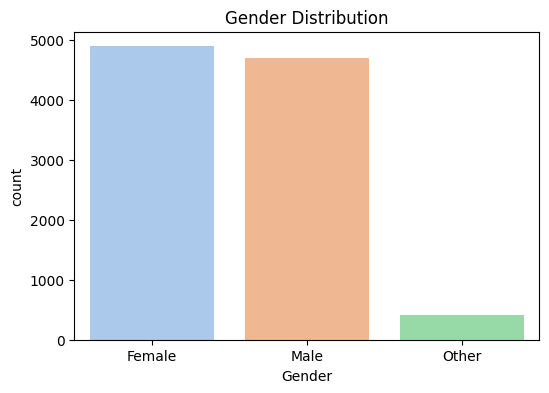

In [23]:
# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette="pastel")
plt.title("Gender Distribution")
plt.savefig(os.path.join(assets_dir, 'gender_distribution.png'))
plt.show()

### Education Level

/tmp/ipython-input-2056447847.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education_Level', data=df, palette="muted")


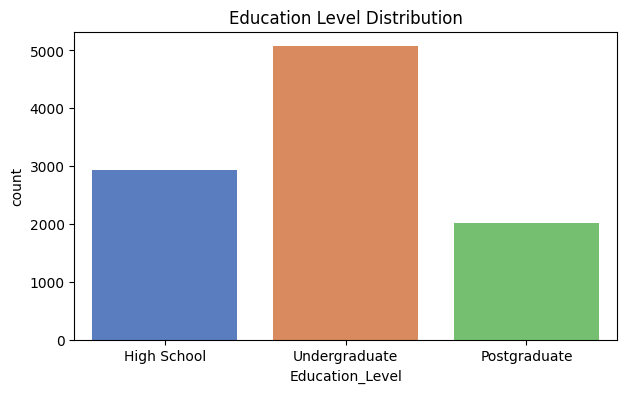

In [24]:
# Education Level
plt.figure(figsize=(7,4))
sns.countplot(x='Education_Level', data=df, palette="muted")
plt.title("Education Level Distribution")
plt.savefig(os.path.join(assets_dir, 'education_level_distribution.png'))
plt.show()

### Dropout Likelihood

/tmp/ipython-input-1916732993.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dropout_Likelihood', data=df, palette="Set1")


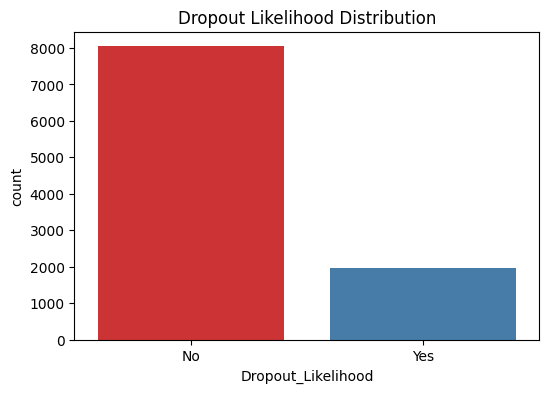

In [25]:
# Dropout Likelihood
plt.figure(figsize=(6,4))
sns.countplot(x='Dropout_Likelihood', data=df, palette="Set1")
plt.title("Dropout Likelihood Distribution")
plt.savefig(os.path.join(assets_dir, 'dropout_likelihood_distribution.png'))
plt.show()

### [EDA] Dropout Distribution by Education Level & Learning Style


In [11]:
print("Dropout by Education Level:\n", pd.crosstab(df['Education_Level'], df['Dropout_Likelihood']))
print("\nDropout by Learning Style:\n", pd.crosstab(df['Learning_Style'], df['Dropout_Likelihood']))


Dropout by Education Level:
 Dropout_Likelihood    No  Yes
Education_Level              
High School         2346  577
Postgraduate        1621  386
Undergraduate       4076  994

Dropout by Learning Style:
 Dropout_Likelihood    No  Yes
Learning_Style               
Auditory            1997  481
Kinesthetic         1956  487
Reading/Writing     2059  495
Visual              2031  494


##  Final Exam Score vs Dropout Likelihood
##  Time Spent on Videos vs Engagement Level


/tmp/ipython-input-86218770.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dropout_Likelihood', y='Final_Exam_Score', data=df, palette="Set3")


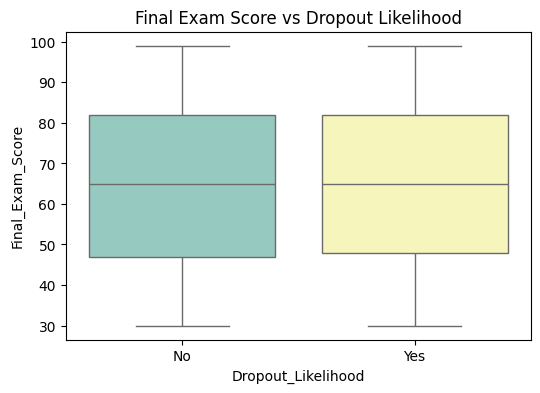

/tmp/ipython-input-86218770.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Engagement_Level', y='Time_Spent_on_Videos', data=df, palette="Set2")


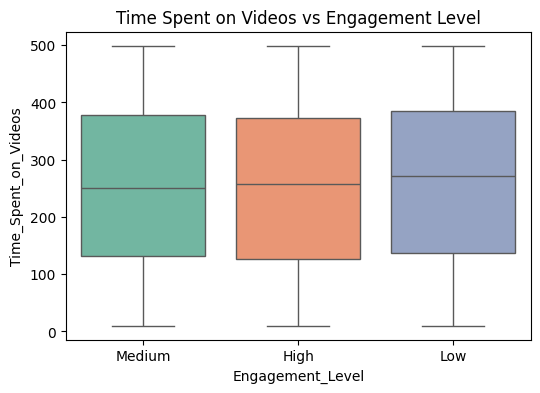

In [26]:
# Final Exam Score vs Dropout
plt.figure(figsize=(6,4))
sns.boxplot(x='Dropout_Likelihood', y='Final_Exam_Score', data=df, palette="Set3")
plt.title("Final Exam Score vs Dropout Likelihood")
plt.savefig(os.path.join(assets_dir, 'final_exam_score_vs_dropout.png'))
plt.show()

# Time Spent vs Engagement
plt.figure(figsize=(6,4))
sns.boxplot(x='Engagement_Level', y='Time_Spent_on_Videos', data=df, palette="Set2")
plt.title("Time Spent on Videos vs Engagement Level")
plt.savefig(os.path.join(assets_dir, 'time_spent_vs_engagement.png'))
plt.show()

## Feature Importance Analysis using Decision Tree


In [13]:


df_enc = df.copy()

# Encode categorical features (including Course_Name this time)
cat_cols = ['Gender','Education_Level','Engagement_Level','Learning_Style','Dropout_Likelihood','Course_Name']
for col in cat_cols:
    df_enc[col] = LabelEncoder().fit_transform(df_enc[col])

# Define X and y
X = df_enc.drop(columns=['Student_ID','Dropout_Likelihood'])
y = df_enc['Dropout_Likelihood']

# Train quick decision tree
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X, y)

# Feature importance
feat_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:\n", feat_importance)



Feature Importance:
 Forum_Participation           0.192331
Time_Spent_on_Videos          0.190676
Quiz_Attempts                 0.180984
Engagement_Level              0.174394
Quiz_Scores                   0.162092
Final_Exam_Score              0.099523
Education_Level               0.000000
Gender                        0.000000
Age                           0.000000
Course_Name                   0.000000
Assignment_Completion_Rate    0.000000
Learning_Style                0.000000
Feedback_Score                0.000000
dtype: float64


## [CBF] Content-Based Filtering: Student Profile Similarity and Recommendations


In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

# -------- Step 1: Select Features --------
numeric_features = [
    "Time_Spent_on_Videos", "Quiz_Attempts", "Quiz_Scores",
    "Forum_Participation", "Assignment_Completion_Rate",
    "Final_Exam_Score", "Feedback_Score"
]
categorical_features = ["Learning_Style", "Education_Level", "Gender"]

# -------- Step 2: Scale Numeric Features --------
scaler = MinMaxScaler()
X_num = scaler.fit_transform(df[numeric_features])

# -------- Step 3: Encode Categorical Features --------
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_cat = encoder.fit_transform(df[categorical_features])

# -------- Step 4: Combine into Student Profiles --------
X_students = np.hstack([X_num, X_cat])

# -------- Step 5: Build Course Profiles (Centroids) --------
course_profiles = (
    pd.DataFrame(X_students, index=df.index)
    .groupby(df["Course_Name"])
    .mean()
)

# -------- Step 6: Recommend for a Given Student --------
def recommend_content_based(student_id, topn=5):
    # Locate student row
    idx = df.index[df["Student_ID"] == student_id][0]
    student_vec = X_students[idx:idx+1]
    student_course = df.loc[idx, "Course_Name"]

    # Compute similarity with all course profiles
    sims = cosine_similarity(student_vec, course_profiles.values).ravel()
    scores = pd.Series(sims, index=course_profiles.index)

    # Exclude the course the student already took
    scores = scores.drop(student_course, errors="ignore")

    # Top-N recommendations
    top_courses = scores.sort_values(ascending=False).head(topn)
    result = pd.DataFrame({
        "Recommended_Course": top_courses.index,
        "Similarity_Score": top_courses.values
    })
    result["Student_ID"] = student_id
    result["Current_Course"] = student_course
    return result


### TESTING THE CBF

In [15]:
recommend_content_based("S00001", topn=5)


,Recommended_Course,Similarity_Score,Student_ID,Current_Course
0,Data Science,0.668612,S00001,Machine Learning
1,Python Basics,0.667477,S00001,Machine Learning
2,Web Development,0.666963,S00001,Machine Learning
3,Cybersecurity,0.650550,S00001,Machine Learning


## [CF] Collaborative Filtering: User–User Similarity and Neighbor-Based Recommendations


In [16]:


# -------- Step 1: Compute User-User Similarity Matrix --------
user_sim = cosine_similarity(X_students)

# -------- Step 2: Recommend for a Given Student --------
def recommend_collaborative(student_id, topn=5, k_neighbors=50):
    # Locate student index
    idx = df.index[df["Student_ID"] == student_id][0]
    student_course = df.loc[idx, "Course_Name"]

    # Get similarity scores for this student
    sims = user_sim[idx].copy()
    sims[idx] = -1  # ignore self

    # Get top-K nearest neighbors
    nn_idx = sims.argsort()[::-1][:k_neighbors]
    nn_sims = sims[nn_idx]
    nn_courses = df.iloc[nn_idx]["Course_Name"].values

    # Aggregate neighbor votes (weighted by similarity)
    course_scores = {}
    for c, w in zip(nn_courses, nn_sims):
        course_scores[c] = course_scores.get(c, 0) + max(w, 0)

    # Convert to DataFrame
    scores = pd.Series(course_scores).sort_values(ascending=False)

    # Exclude student’s current course
    scores = scores.drop(student_course, errors="ignore")

    # Top-N recommendations
    top_courses = scores.head(topn)
    result = pd.DataFrame({
        "Recommended_Course": top_courses.index,
        "Collaborative_Score": top_courses.values
    })
    result["Student_ID"] = student_id
    result["Current_Course"] = student_course
    return result
# -------- Step 3: Test with Sample Student --------
sample_id = "S03344"
recommendations_cf = recommend_collaborative(sample_id, topn=5)
print(recommendations_cf)



  Recommended_Course  Collaborative_Score Student_ID Current_Course
0    Web Development            11.595632     S03344  Python Basics
1   Machine Learning             9.706327     S03344  Python Basics
2      Cybersecurity             7.715884     S03344  Python Basics
3       Data Science             5.788385     S03344  Python Basics


## [COMPARISON] Side-by-Side Comparison of Content-Based and Collaborative Filtering Results


In [17]:
def compare_recommenders(student_id, topn=5, k_neighbors=50):
    # Content-Based
    cbf_results = recommend_content_based(student_id, topn=topn)
    cbf_results = cbf_results[["Recommended_Course", "Similarity_Score"]]
    cbf_results = cbf_results.rename(columns={"Similarity_Score": "Content_Score"})

    # Collaborative
    cf_results = recommend_collaborative(student_id, topn=topn, k_neighbors=k_neighbors)
    cf_results = cf_results[["Recommended_Course", "Collaborative_Score"]]

    # Merge results side by side
    comparison = pd.merge(
        cbf_results,
        cf_results,
        on="Recommended_Course",
        how="outer"
    )

    # Add metadata
    current_course = df.loc[df["Student_ID"] == student_id, "Course_Name"].values[0]
    comparison["Student_ID"] = student_id
    comparison["Current_Course"] = current_course

    return comparison

# -------- Test with a sample student --------
sample_id = "S00001"
compare_results = compare_recommenders(sample_id, topn=5)
print(compare_results)


  Recommended_Course  Content_Score  Collaborative_Score Student_ID  \
0      Cybersecurity       0.650550             9.412838     S00001   
1       Data Science       0.668612             9.469284     S00001   
2      Python Basics       0.667477             8.455899     S00001   
3    Web Development       0.666963             8.515408     S00001   

     Current_Course  
0  Machine Learning  
1  Machine Learning  
2  Machine Learning  
3  Machine Learning  


## [COMPARISON] Visualization of CBF vs CF Recommendations (Bar Chart)


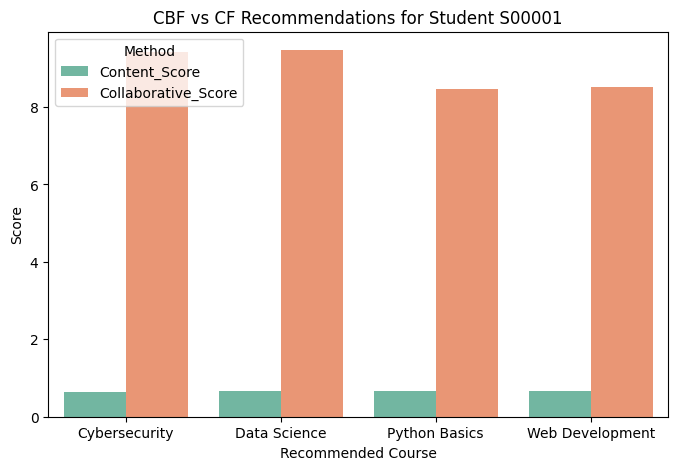

In [27]:


def plot_recommender_comparison(student_id, topn=5, k_neighbors=50):
    comparison = compare_recommenders(student_id, topn, k_neighbors)

    plot_df = comparison.melt(
        id_vars=["Recommended_Course"],
        value_vars=["Content_Score", "Collaborative_Score"],
        var_name="Method",
        value_name="Score"
    )

    # Plot
    plt.figure(figsize=(8,5))
    sns.barplot(x="Recommended_Course", y="Score", hue="Method", data=plot_df, palette="Set2")
    plt.title(f"CBF vs CF Recommendations for Student {student_id}")
    plt.ylabel("Score")
    plt.xlabel("Recommended Course")
    plt.legend(title="Method")
    plt.savefig(os.path.join(assets_dir, f'cbf_vs_cf_recommendations_{student_id}.png'))
    plt.show()

# -------- Test with a sample student --------
plot_recommender_comparison("S00001", topn=5)


## [EVALUATION] Average Recommendation Scores: Content-Based vs Collaborative Filtering


/tmp/ipython-input-429206611.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Method", y="Average_Score", data=results, palette=["skyblue", "salmon"])


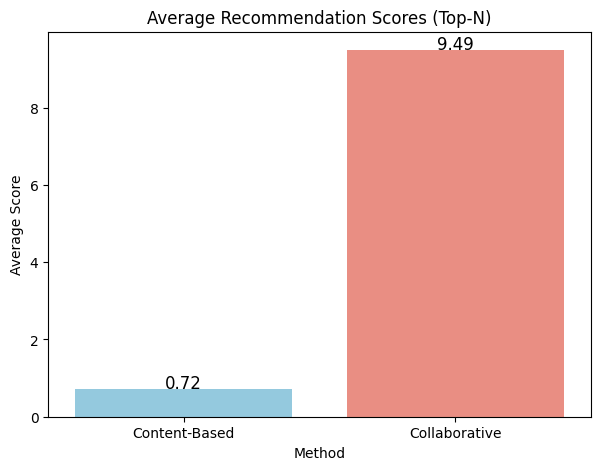

,Method,Average_Score
0,Content-Based,0.724458
1,Collaborative,9.493490


In [28]:

def evaluate_methods(student_ids, topn=5, k_neighbors=50):
    cbf_scores = []
    cf_scores = []

    for sid in student_ids:
        # Get recommendations from both
        cbf = recommend_content_based(sid, topn=topn)
        cf = recommend_collaborative(sid, topn=topn, k_neighbors=k_neighbors)

        # Take the average of top-N scores
        cbf_scores.append(cbf["Similarity_Score"].mean())
        cf_scores.append(cf["Collaborative_Score"].mean())

    # Calculate averages
    avg_cbf = np.mean(cbf_scores)
    avg_cf = np.mean(cf_scores)

    # Prepare data for plotting
    results = pd.DataFrame({
        "Method": ["Content-Based", "Collaborative"],
        "Average_Score": [avg_cbf, avg_cf]
    })

    # Plot
    plt.figure(figsize=(7,5))
    sns.barplot(x="Method", y="Average_Score", data=results, palette=["skyblue", "salmon"])
    for index, row in results.iterrows():
        plt.text(index, row["Average_Score"]+0.01, f"{row['Average_Score']:.2f}", ha='center', fontsize=12)
    plt.title("Average Recommendation Scores (Top-N)")
    plt.ylabel("Average Score")
    plt.savefig(os.path.join(assets_dir, 'average_recommendation_scores.png'))
    plt.show()

    return results

# -------- Example: Evaluate on first 100 students --------
sample_students = df["Student_ID"].head(100).tolist()
evaluate_methods(sample_students, topn=5)


In [20]:
import os

assets_dir = 'assets'

if not os.path.exists(assets_dir):
    os.makedirs(assets_dir)
    print(f"Directory '{assets_dir}' created successfully.")
else:
    print(f"Directory '{assets_dir}' already exists.")

Directory 'assets' created successfully.


In [29]:
import os

assets_dir = 'assets'

# Check if the assets directory exists before zipping
if os.path.exists(assets_dir):
    zip_command = f"zip -r {assets_dir}.zip {assets_dir}"
    print(f"Executing: {zip_command}")
    os.system(zip_command)
    print(f"Folder '{assets_dir}' has been zipped to '{assets_dir}.zip'.")
else:
    print(f"Directory '{assets_dir}' does not exist. No folder to zip.")

Executing: zip -r assets.zip assets
Folder 'assets' has been zipped to 'assets.zip'.
